In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cic-ids/cleaned_data1.csv')

# Feature Selection 

In [ ]:
df.replace(to_replace=["Bot", "FTP-BruteForce", "SSH-Bruteforce","DoS attacks-GoldenEye","DoS attacks-Slowloris"], value="Malicious", inplace=True)

In [ ]:
df['Label'].value_counts()

Benign       2426087
Malicious     719638
Name: Label, dtype: int64

In [ ]:
df.replace(to_replace="Benign", value=0, inplace=True)
df.replace(to_replace="Malicious", value=1, inplace=True)

In [ ]:
df.drop('Bwd URG Flags','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Fwd Pkts/b Avg','CWE Flag Count','Fwd URG Flags','Bwd PSH Flags','Fwd Byts/b Avg','Bwd Byts/b Avg','Fwd Blk Rate Avg','Protocol_17','Pkt Len Min','FIN Flag Cnt','Active Std','SYN Flag Cnt', axis='columns',inplace=True)

# Scaling

In [ ]:
y = df['Label']
x = df.drop(['Label'],axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (2516580, 77), (2516580,)
Shape of testing data : (629145, 77), (629145,)


# Making the model

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline


clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))


In [ ]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

# Evaluation matrix


Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix
conf = confusion_matrix(y_test,y_pred)
print(conf)

[[472955  12210]
 [   596 143384]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


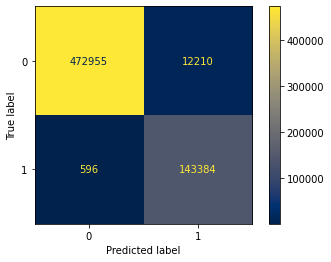

In [ ]:
plot_confusion_matrix(clf, x_test, y_test, cmap="cividis")

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy score: 0.9796453917618355


Recall Score

In [ ]:
from sklearn.metrics import recall_score

print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.9958605361855813


Classification Report

In [ ]:
print("Classification Report {}".format(classification_report(y_test,y_pred,digits=5)))

Classification Report               precision    recall  f1-score   support

           0    0.99874   0.97483   0.98664    485165
           1    0.92153   0.99586   0.95725    143980

    accuracy                        0.97965    629145
   macro avg    0.96013   0.98535   0.97195    629145
weighted avg    0.98107   0.97965   0.97992    629145



In [ ]:
import pickle

with open('/content/drive/MyDrive/TrainedModels/svm.pkl', 'wb') as f:
  pickle.dump(clf, f)